In [2]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import scipy
import numpy
import matplotlib.pyplot as plt

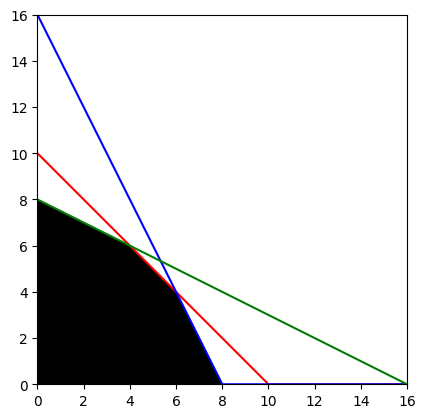

In [43]:
# Plot the feasible region
bd = 16
x = numpy.arange(0, bd, 0.01)
y = numpy.arange(0, bd, 0.01)
w, b = numpy.meshgrid(x, y)
plt.imshow(((w + b <= 10) & (3 * w + 6 * b <= 48) & (4 * w + 2 * b <= 32)) * 1, cmap = "Greys", origin = 'lower', extent = (0, bd, 0, bd))
plt.plot(x, numpy.clip(10 - x, 0, bd), color = "red")
plt.plot(x, numpy.clip(16 - 2 * x, 0, bd), color = "blue")
plt.plot(x, numpy.clip(8 - 0.5 * x, 0, bd), color = "green")

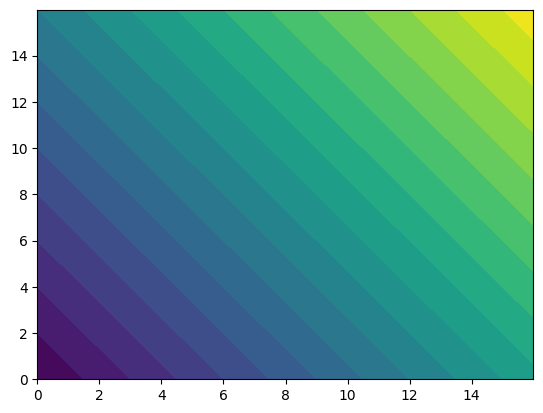

In [42]:
# Plot the objective funtion
plt.contourf(w, b, 4 * w + 3 * b, levels = 20)

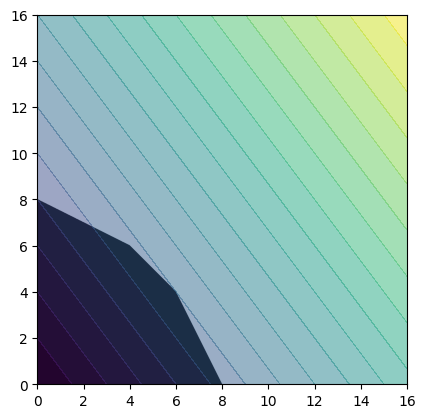

In [50]:
# Put them together
plt.imshow(((w + b <= 10) & (3 * w + 6 * b <= 48) & (4 * w + 2 * b <= 32)) * 1, cmap = "Greys", origin = 'lower', extent = (0, bd, 0, bd))
plt.contourf(w, b, 4 * w + 3 * b, levels = 20, alpha = 0.5)

In [54]:
# Solve the linear program (the default is minimization)
c = numpy.array([4, 3])
A = numpy.array([[1, 1], [3, 6], [4, 2]])
b = numpy.array([10, 48, 32])
scipy.optimize.linprog(-c, A, b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -36.0
              x: [ 6.000e+00  4.000e+00]
            nit: 3
          lower:  residual: [ 6.000e+00  4.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  6.000e+00  0.000e+00]
                 marginals: [-2.000e+00 -0.000e+00 -5.000e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [58]:
# Solve the dual linear program
scipy.optimize.linprog(b, -numpy.transpose(A), -c)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 36.0
              x: [ 2.000e+00  0.000e+00  5.000e-01]
            nit: 2
          lower:  residual: [ 2.000e+00  0.000e+00  5.000e-01]
                 marginals: [ 0.000e+00  6.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-6.000e+00 -4.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0